1.591739743137194


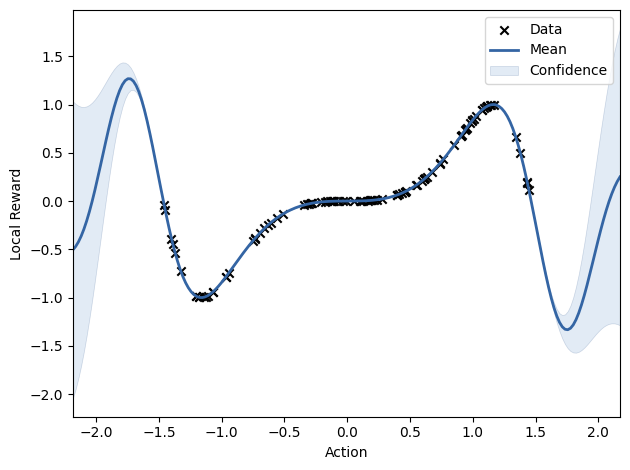

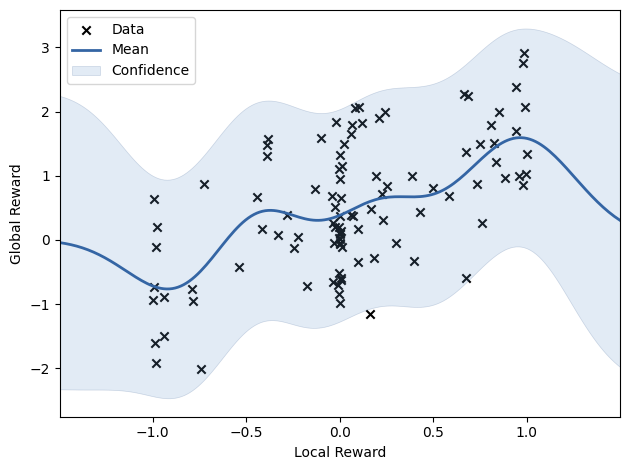

In [3]:
import numpy as np
import GPy
import matplotlib.pyplot as plt

from agent_utilities import *
# sample inputs and outputs
x1 = np.random.uniform(-1.5,1.5,100).reshape(-1,1)
x2 = np.random.uniform(-1.5,1.5,100).reshape(-1,1)
x3 = np.random.uniform(-1.5,1.5,100).reshape(-1,1)

y = np.sin(x1**3) + np.cos(x2**2) - np.sin(x3) 


y1 = np.sin(x1**3).reshape(-1,1)
y2 = np.cos(x2**2).reshape(-1,1)
y3 = np.sin(x3).reshape(-1,1)

kern = GPy.kern.RBF(1)


g1 = GPy.models.GPRegression(x1,y1,kern) #g(x)

g1.optimize()
g1.plot()
plt.ylabel('Local Reward')
plt.xlabel('Action')



#predict f(g(x))

f1 =GPy.models.GPRegression(g1.predict(x1)[0],y,kern)
f1.optimize()
f1.plot()
plt.ylabel('Global Reward')
plt.xlabel('Local Reward')

#print the x value for which f(g(x)) is maximum
print(f1.predict(x1)[0].max())





[2.916987]
[1.00000198]


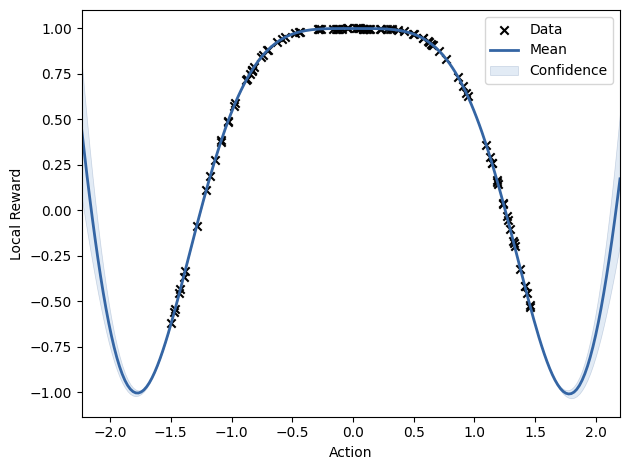

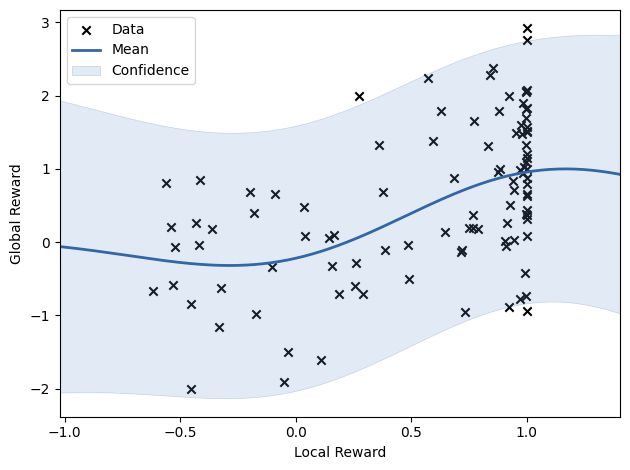

In [4]:
#similary for y2 and y3
g2 = GPy.models.GPRegression(x2,y2,kern) #g2(x)
g2.optimize()
g2.plot()
plt.xlabel('Action')
plt.ylabel('Local Reward')

f2 =GPy.models.GPRegression(g2.predict(x2)[0],y,kern)
f2.optimize()
f2.plot()
plt.ylabel('Global Reward')
plt.xlabel('Local Reward')

print(max(f2.Y))
print(max(f2.X))
#print the x value for which f(g2(x)) is maximum





[2.916987]
[-0.97563198]
[1.45660141]
[0.99348684]


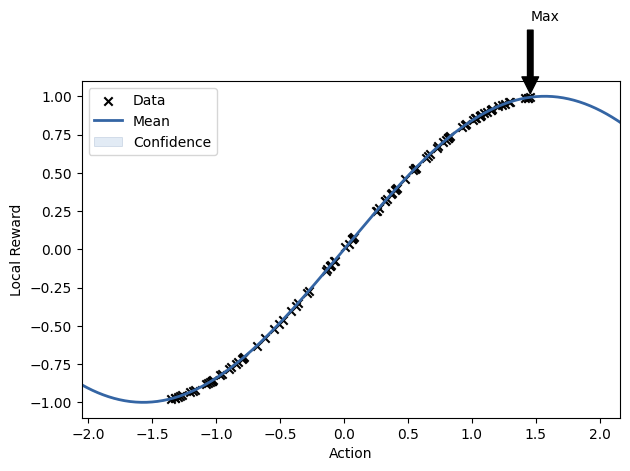

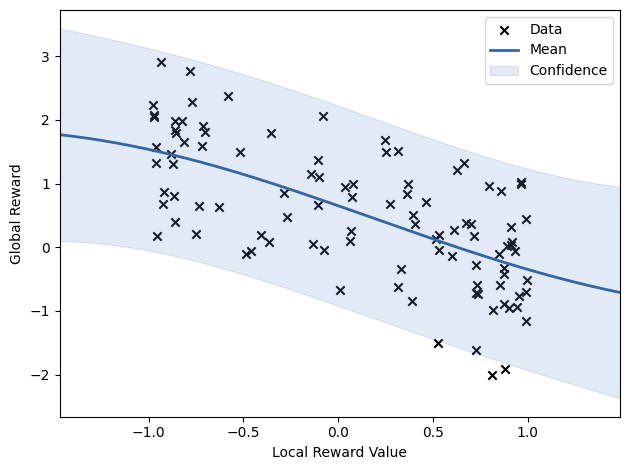

In [15]:

#for y3
g3 = GPy.models.GPRegression(x3,y3,kern) #g3(x)
g3.optimize()
g3.plot()
plt.annotate('Max', xy=(max(g3.X), max(g3.Y)), xytext=(max(g3.X), max(g3.Y)+0.5), arrowprops=dict(facecolor='black', shrink=0.05))

plt.ylabel('Local Reward')  
plt.xlabel('Action')

f3 =GPy.models.GPRegression(g3.predict(x3)[0],y,kern)
f3.optimize()
f3.plot()
plt.ylabel('Global Reward')
plt.xlabel('Local Reward Value')

print(max(f3.Y))
print(min(f3.X))
print(max(g3.X))
print(max(g3.Y))

In [6]:
f3.predict(x3)[0].max()
x3[2]


array([-1.04582349])

In [7]:
g3.Y.min()

array(-0.9756402)

In [8]:
bounds = (np.min(x1), np.max(x1))

In [9]:
agent1 = Agent(1,bounds,0)
agent2 = Agent(2,bounds,0.1)
agent3 = Agent(3,bounds,-0.1)

agents = [agent1,agent2,agent3]

Local Reward for agent 1 is [[0.]]
Agent 1 is using True as optimization criterion.
Local Reward for agent 2 is [[0.99995]]
Agent 2 is using True as optimization criterion.
Local Reward for agent 3 is [[-0.09983342]]
Agent 3 is using True as optimization criterion.


Perfrom BO 


In [10]:
#get the maximum value of f(g(x)) for each agent
max1 = f1.predict(x1)[0].max()
max2 = f2.predict(x2)[0].max()
max3 = f3.predict(x3)[0].max()

print(max1,max2,max3)



5.897913956800898 3.4911724934198967 1.7243863516181464


In [11]:


x_next_local_1 = np.asarray([agent1.predict_local()]) #predict action x of local rewards g(x)

y_local_1 = agent1.local_reward(x_next_local_1) #obtain y= g(x) 
print(y_local_1)


#use the trained model f(g(x)) to predict global reward

y_reward_curr = f1.predict(x_next_local_1)[0] #predict global reward
print(y_reward_curr)
dist1 = np.abs(max1 - y_reward_curr)
obj = -dist1



[[-0.03746947]]
[[2.67594157]]


In [12]:
# m2 = GPy.models.GPRegression(x2,y2,kern)
# m2.optimize()

# m2_g = GPy.models.GPRegression(x2,y,kern)
# m2_g.optimize()

# y2_pred, _ = m2.predict(x2)
# y_pred2, _ = m2_g.predict(x2)

# # kern_relation2 = GPy.kern.RBF(1)
# m_relation2 = GPy.models.GPRegression(y2_pred, y_pred2, kern_relation2)
# m_relation2.optimize()

# m_relation2.plot()

In [13]:
# model_3 = GPy.models.GPRegression(y1,y,kern)
# model_3.optimize(messages=True)
# model_3.optimize_restarts(num_restarts = 10)

# model_3.plot()